# Objetivo

Hacer pronóstico con rf y función recursiva

In [1]:
""" importamos libreriaS """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQUIt0M8NAo8HzjEcPXDQ3UheoaHg_4DPzkY_I-1kWT5tXgKlgclViv0nrcpdym2g/pub?gid=1410684387&single=true&output=csv'

In [3]:
df = pd.read_csv(link)

df = pd.read_csv(link, index_col='ciclo', )


In [4]:
# selecciono features

df = df.loc[df.Activo_id==1,['s2']]
df.head()

,s2
ciclo,
1,641.82
2,642.15
3,642.35
4,642.35
5,642.37


Plot de las variables en el tiempo("Ciclo")

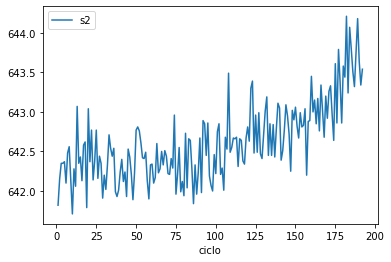

In [5]:
df.plot()

In [6]:
melt = df.copy()

In [7]:
melt.head()

,s2
ciclo,
1,641.82
2,642.15
3,642.35
4,642.35
5,642.37


# generamos predictores

In [8]:
melt['t-1'] = melt['s2'].shift(1)
melt['diff_1'] = melt['s2'].diff(1)
melt['MA_4']= melt['s2'].rolling(4).mean()
melt['vf'] = melt['s2'].shift(-1)
melt['vf2'] = melt['s2'].shift(-2)
melt['vf3'] = melt['s2'].shift(-3)
melt['vf4'] = melt['s2'].shift(-4)
melt['vf5'] = melt['s2'].shift(-5)
melt['vf6'] = melt['s2'].shift(-6)
melt['vf7'] = melt['s2'].shift(-7)
melt.head()

,s2,t-1,diff_1,MA_4,vf,vf2,vf3,vf4,vf5,vf6,vf7
ciclo,,,,,,,,,,,
1,641.82,NaN,NaN,NaN,642.15,642.35,642.35,642.37,642.10,642.48,642.56
2,642.15,641.82,0.33,NaN,642.35,642.35,642.37,642.10,642.48,642.56,642.12
3,642.35,642.15,0.20,NaN,642.35,642.37,642.10,642.48,642.56,642.12,641.71
4,642.35,642.35,0.00,642.1675,642.37,642.10,642.48,642.56,642.12,641.71,642.28
5,642.37,642.35,0.02,642.3050,642.10,642.48,642.56,642.12,641.71,642.28,642.06


In [9]:
melt = melt.dropna()

In [10]:
melt.head()

,s2,t-1,diff_1,MA_4,vf,vf2,vf3,vf4,vf5,vf6,vf7
ciclo,,,,,,,,,,,
4,642.35,642.35,0.00,642.1675,642.37,642.10,642.48,642.56,642.12,641.71,642.28
5,642.37,642.35,0.02,642.3050,642.10,642.48,642.56,642.12,641.71,642.28,642.06
6,642.10,642.37,-0.27,642.2925,642.48,642.56,642.12,641.71,642.28,642.06,643.07
7,642.48,642.10,0.38,642.3250,642.56,642.12,641.71,642.28,642.06,643.07,642.35
8,642.56,642.48,0.08,642.3775,642.12,641.71,642.28,642.06,643.07,642.35,642.43


Split

In [11]:
sp = len(melt) - 20
sp

162

In [12]:
split_point = sp
print(split_point)

melt_train = melt.iloc[:split_point, :]
melt_valid = melt.iloc[split_point:, :].dropna()


162


La matriz de caracteristicas X, y

In [13]:
features = melt.columns[:-1]
target = melt.columns[-1]
print(features,target)

Index(['s2', 't-1', 'diff_1', 'MA_4', 'vf', 'vf2', 'vf3', 'vf4', 'vf5', 'vf6'], dtype='object') vf7


In [14]:
X = melt[features]

X_train = melt_train[features]
y_train = melt_train[target].values.reshape(-1,1)

X_test = melt_valid[features]
y_test = melt_valid[target].values.reshape(-1,1)

print(len(X_train),len(y_test))

162 20


# data entrenamiento

In [15]:
X_test.shape

(20, 10)

# Creando el modelo de Redes neuronales perceptrón

In [16]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(random_state=0,n_jobs = -1)
modelo.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_jobs=-1, random_state=0)

Plot Train

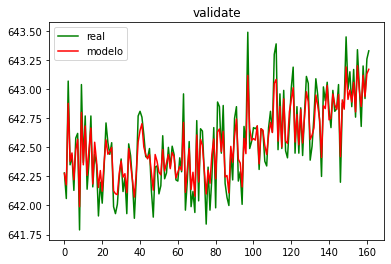

In [17]:
results_0 = modelo.predict(X_train)
plt.plot(range(len(y_train)),y_train,c='g',label='real')
plt.plot(range(len(results_0)),results_0,c='r', label = 'modelo')
plt.title('validate')
plt.legend(loc = 'best')
plt.show()

# Plot data test

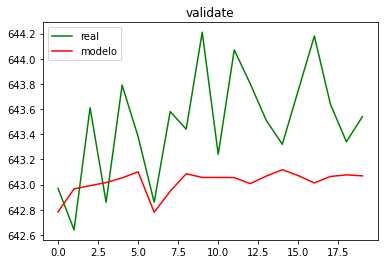

In [18]:
results = modelo.predict(X_test)
plt.plot(range(len(y_test)),y_test,c='g',label='real')
plt.plot(range(len(results)),results,c='r', label = 'modelo')
plt.title('validate')
plt.legend(loc = 'best')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
mean_squared_error(y_test,results)

0.3700185510000936

Pronóstico Ventas futuras

In [21]:
df.tail()

,s2
ciclo,
188,643.75
189,644.18
190,643.64
191,643.34
192,643.54


In [22]:
# selecciono los últimos 16 dias
ultimos16Dias = df[-20:]
ultimos16Dias

,s2
ciclo,
173,642.97
174,642.64
175,643.61
176,642.86
177,643.79
178,643.38
179,642.86
180,643.58
181,643.44


In [23]:
# escalados

ultimos16Dias.columns=['val']
ultimos16Dias

,val
ciclo,
173,642.97
174,642.64
175,643.61
176,642.86
177,643.79
178,643.38
179,642.86
180,643.58
181,643.44


In [24]:
ultimos16Dias['t-1'] = ultimos16Dias['val'].shift(1)
ultimos16Dias['diff_1'] = ultimos16Dias['val'].diff(1)
ultimos16Dias['MA_4']= ultimos16Dias['val'].rolling(4).mean()
ultimos16Dias['vf'] = ultimos16Dias['val'].shift(-1)
ultimos16Dias['vf2'] = ultimos16Dias['val'].shift(-2)
ultimos16Dias['vf3'] = ultimos16Dias['val'].shift(-3)
ultimos16Dias['vf4'] = ultimos16Dias['val'].shift(-4)
ultimos16Dias['vf5'] = ultimos16Dias['val'].shift(-5)
ultimos16Dias['vf6'] = ultimos16Dias['val'].shift(-6)
ultimos16Dias['vf7'] = ultimos16Dias['val'].shift(-7)
ultimos16Dias=ultimos16Dias.dropna()
ultimos16Dias.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,val,t-1,diff_1,MA_4,vf,vf2,vf3,vf4,vf5,vf6,vf7
ciclo,,,,,,,,,,,
176,642.86,643.61,-0.75,643.0200,643.79,643.38,642.86,643.58,643.44,644.21,643.24
177,643.79,642.86,0.93,643.2250,643.38,642.86,643.58,643.44,644.21,643.24,644.07
178,643.38,643.79,-0.41,643.4100,642.86,643.58,643.44,644.21,643.24,644.07,643.80
179,642.86,643.38,-0.52,643.2225,643.58,643.44,644.21,643.24,644.07,643.80,643.51
180,643.58,642.86,0.72,643.4025,643.44,644.21,643.24,644.07,643.80,643.51,643.32


In [25]:
# quitamos la ultima fila para predecirla
ld_train = ultimos16Dias.iloc[:,:-1]
ld_train

,val,t-1,diff_1,MA_4,vf,vf2,vf3,vf4,vf5,vf6
ciclo,,,,,,,,,,
176,642.86,643.61,-0.75,643.0200,643.79,643.38,642.86,643.58,643.44,644.21
177,643.79,642.86,0.93,643.2250,643.38,642.86,643.58,643.44,644.21,643.24
178,643.38,643.79,-0.41,643.4100,642.86,643.58,643.44,644.21,643.24,644.07
179,642.86,643.38,-0.52,643.2225,643.58,643.44,644.21,643.24,644.07,643.80
180,643.58,642.86,0.72,643.4025,643.44,644.21,643.24,644.07,643.80,643.51
181,643.44,643.58,-0.14,643.3150,644.21,643.24,644.07,643.80,643.51,643.32
182,644.21,643.44,0.77,643.5225,643.24,644.07,643.80,643.51,643.32,643.75
183,643.24,644.21,-0.97,643.6175,644.07,643.80,643.51,643.32,643.75,644.18
184,644.07,643.24,0.83,643.7400,643.80,643.51,643.32,643.75,644.18,643.64


In [26]:
# seleccionamos la última fila (valor más actualizado)
X_test = ld_train.iloc[-1, :].values
X_test

array([ 6.4380e+02,  6.4407e+02, -2.7000e-01,  6.4383e+02,  6.4351e+02,
        6.4332e+02,  6.4375e+02,  6.4418e+02,  6.4364e+02,  6.4334e+02])

In [27]:
# le damos la dimensión de la data con la que fue entrenado el modelo
X_test = X_test.reshape((1,X_test.shape[0]))
X_test.shape

(1, 10)

Función recursiva

In [28]:
# el parametro es el númerod e días a predecir con la última data ingresada

parametro = 7

def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[1]-1):
        x_test[0][i] = x_test[0][i+1]
    x_test[0][x_test.shape[1]-1] = nuevoValor
    return x_test
 
results=[]
for i in range(parametro):
    parcial=modelo.predict(X_test)
    results.append(parcial[0])
    print(X_test)
    X_test=agregarNuevoValor(X_test,parcial[0])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


[[ 6.4380e+02  6.4407e+02 -2.7000e-01  6.4383e+02  6.4351e+02  6.4332e+02
   6.4375e+02  6.4418e+02  6.4364e+02  6.4334e+02]]
[[ 6.440700e+02 -2.700000e-01  6.438300e+02  6.435100e+02  6.433200e+02
   6.437500e+02  6.441800e+02  6.436400e+02  6.433400e+02  6.430693e+02]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


[[-2.700000e-01  6.438300e+02  6.435100e+02  6.433200e+02  6.437500e+02
   6.441800e+02  6.436400e+02  6.433400e+02  6.430693e+02  6.429861e+02]]
[[643.83   643.51   643.32   643.75   644.18   643.64   643.34   643.0693
  642.9861 643.0352]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


[[643.51   643.32   643.75   644.18   643.64   643.34   643.0693 642.9861
  643.0352 643.0461]]
[[643.32   643.75   644.18   643.64   643.34   643.0693 642.9861 643.0352
  643.0461 643.0719]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


[[643.75   644.18   643.64   643.34   643.0693 642.9861 643.0352 643.0461
  643.0719 643.0656]]


In [29]:
# convertimos la matriz en lista
adimen = [x for x in results]    

In [30]:
adimen

[643.0693,
 642.9861000000001,
 643.0351999999993,
 643.0460999999999,
 643.0718999999997,
 643.0655999999996,
 642.9884999999996]

In [31]:
type(adimen)

list

In [32]:
# convertimos la lista en array
miarray = np.array(adimen)
miarray

array([643.0693, 642.9861, 643.0352, 643.0461, 643.0719, 643.0656,
       642.9885])

In [34]:
# ploteando el pronostico
prediccion1SemanaDiciembre = pd.DataFrame(miarray)
prediccion1SemanaDiciembre.columns = ['pronostico']
prediccion1SemanaDiciembre

,pronostico
0,643.0693
1,642.9861
2,643.0352
3,643.0461
4,643.0719
5,643.0656
6,642.9885


In [35]:
total = pd.concat([df[-15:],prediccion1SemanaDiciembre], axis =0)
total

,s2,pronostico
178,643.38,NaN
179,642.86,NaN
180,643.58,NaN
181,643.44,NaN
182,644.21,NaN
183,643.24,NaN
184,644.07,NaN
185,643.80,NaN
186,643.51,NaN
187,643.32,NaN


Plot data test

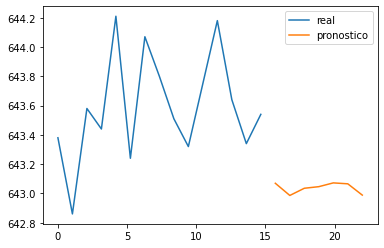

In [36]:
plt.plot(np.linspace(0,len(total),len(total)),total.s2, label ='real')
plt.plot(np.linspace(0,len(total),len(total)),total.pronostico, label ='pronostico')
plt.legend(loc = 'best')